## Обучение с учителем

#### Импорт библиотек

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import pickle
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#### Функция вывода оценок качества модели регрессии(взята из 4 вебинара)

In [2]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

### Отбор признаков

In [13]:
PREPARED_DATASET2_PATH = 'prepared2.csv'
df = pd.read_csv(PREPARED_DATASET2_PATH)
df.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          35      2  47.981561   29.442751            6.0      7           9   
1          41      3  65.683640   40.049543            8.0      7           9   
2          53      2  44.947953   29.197612            0.0      8          12   
3          58      2  53.352981   34.352981            9.0      8          17   
4          99      1  39.649192   23.776169            7.0     11          12   

   HouseYear  Ecology_1  Social_1  Social_2  Social_3  Healthcare_1  \
0       1969   0.089040        33      7976         5         900.0   
1       1978   0.000070        46     10309         1         240.0   
2       1968   0.049637        34      7759         0         229.0   
3       1977   0.437885        23      5735         3        1084.0   
4       1976   0.012339        35      5776         1        2078.0   

   Helthcare_2  Shops_1          Price  StudioApartment  Ecology_2_A  \
0            0       11  184966.930730                0            0   
1            1       16  300009.450063                0            0   
2            1        3  220925.908524                1            0   
3            0        5  175616.227217                0            0   
4            2        4  150226.531644                0            0   

   Ecology_3_A  Shops_2_A  
0            0          0  
1            0          0  
2            0          0  
3            0          0  
4            0          0

In [14]:
df.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Price',
 'StudioApartment',
 'Ecology_2_A',
 'Ecology_3_A',
 'Shops_2_A']

In [15]:
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
                 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3','Healthcare_1','Helthcare_2','Shops_1',
                'Ecology_2_A','Ecology_3_A','Shops_2_A','StudioApartment']
target_name = 'Price'

In [16]:
df = df[feature_names + [target_name]]
df.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          35      2  47.981561   29.442751            6.0      7           9   
1          41      3  65.683640   40.049543            8.0      7           9   
2          53      2  44.947953   29.197612            0.0      8          12   
3          58      2  53.352981   34.352981            9.0      8          17   
4          99      1  39.649192   23.776169            7.0     11          12   

   HouseYear  Ecology_1  Social_1  Social_2  Social_3  Healthcare_1  \
0       1969   0.089040        33      7976         5         900.0   
1       1978   0.000070        46     10309         1         240.0   
2       1968   0.049637        34      7759         0         229.0   
3       1977   0.437885        23      5735         3        1084.0   
4       1976   0.012339        35      5776         1        2078.0   

   Helthcare_2  Shops_1  Ecology_2_A  Ecology_3_A  Shops_2_A  StudioApartment  \
0            0       11            0            0          0                0   
1            1       16            0            0          0                0   
2            1        3            0            0          0                1   
3            0        5            0            0          0                0   
4            2        4            0            0          0                0   

           Price  
0  184966.930730  
1  300009.450063  
2  220925.908524  
3  175616.227217  
4  150226.531644

### Стандартизация признаков

In [18]:
feature_names_for_stand = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
                 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3','Healthcare_1','Helthcare_2','Shops_1']
feature_names_for_stand

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1']

In [19]:
df['DistrictId'] = df['DistrictId'].astype(float)
df['Rooms'] = df['Rooms'].astype(float)
df['Floor'] = df['Floor'].astype(float)
df['HouseFloor'] = df['HouseFloor'].astype(float)
df['HouseYear'] = df['HouseYear'].astype(float)
df['Social_1'] = df['Social_1'].astype(float)
df['Social_2'] = df['Social_2'].astype(float)
df['Social_3'] = df['Social_3'].astype(float)
df['Shops_1'] = df['Shops_1'].astype(float)
df['Helthcare_2'] = df['Helthcare_2'].astype(float)

In [20]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])

In [21]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)
df.head()

DistrictId     Rooms    Square  LifeSquare  KitchenSquare     Floor  \
0   -0.353348  0.127570 -0.400772   -0.304887       0.041514 -0.291306   
1   -0.215687  1.318696  0.443178    0.348831       0.461063 -0.291306   
2    0.059635  0.127570 -0.545400   -0.319995      -1.217132 -0.100498   
3    0.174352  0.127570 -0.144689   -0.002259       0.670838 -0.100498   
4    1.115034 -1.063557 -0.798019   -0.654130       0.251289  0.471924   

   HouseFloor  HouseYear  Ecology_1  Social_1  Social_2  Social_3  \
0   -0.794500  -0.861915  -0.250529  0.474169  0.654880 -0.127533   
1   -0.794500  -0.373184  -0.998053  1.215681  1.237169 -0.295384   
2   -0.297295  -0.916218  -0.581588  0.531208  0.600720 -0.337347   
3    0.531380  -0.427487   2.680470 -0.096225  0.095553 -0.211458   
4   -0.297295  -0.481791  -0.894969  0.588247  0.105786 -0.295384   

   Healthcare_1  Helthcare_2   Shops_1  Ecology_2_A  Ecology_3_A  Shops_2_A  \
0     -0.169240    -0.883480  1.408356            0            0          0   
1     -1.053217    -0.213923  2.448700            0            0          0   
2     -1.067950    -0.213923 -0.256195            0            0          0   
3      0.077202    -0.883480  0.159943            0            0          0   
4      1.408526     0.455633 -0.048126            0            0          0   

   StudioApartment          Price  
0                0  184966.930730  
1                0  300009.450063  
2                1  220925.908524  
3                0  175616.227217  
4                0  150226.531644

### Разбиение на train и test

In [22]:
X = df[feature_names]
y = df[target_name]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=666)

### Построение базовых моделей и выбор лучшей

#### Linear Regression

In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

R2:	0.519
MAE:	43697.398
MSE:	4120876683.809


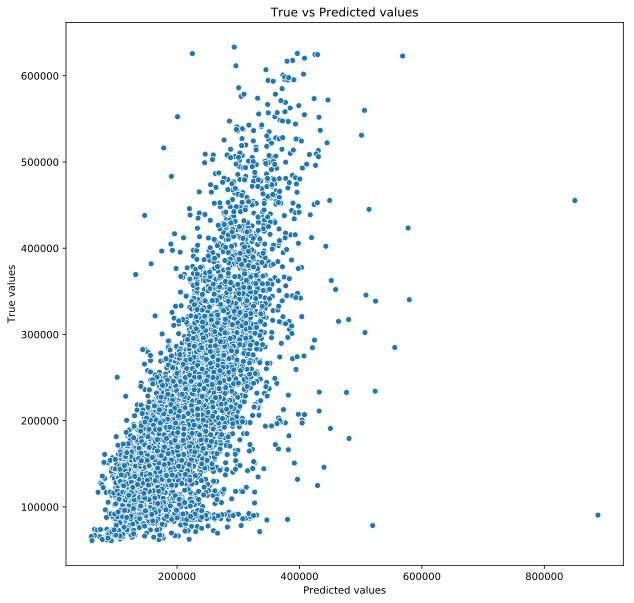

In [27]:
y_train_preds = lr_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.439
MAE:	44356.986
MSE:	4896883352.911


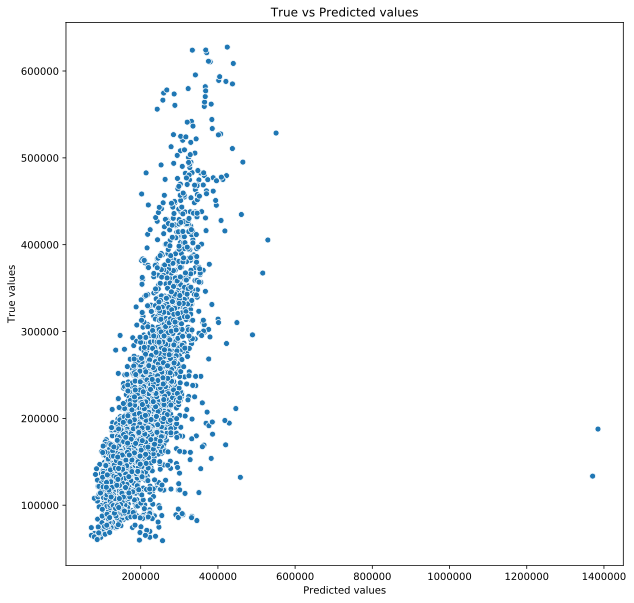

In [28]:
y_test_preds = lr_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

#### Random Forest

In [29]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

C:\Users\stroganov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

R2:	0.946
MAE:	12137.112
MSE:	467139065.813


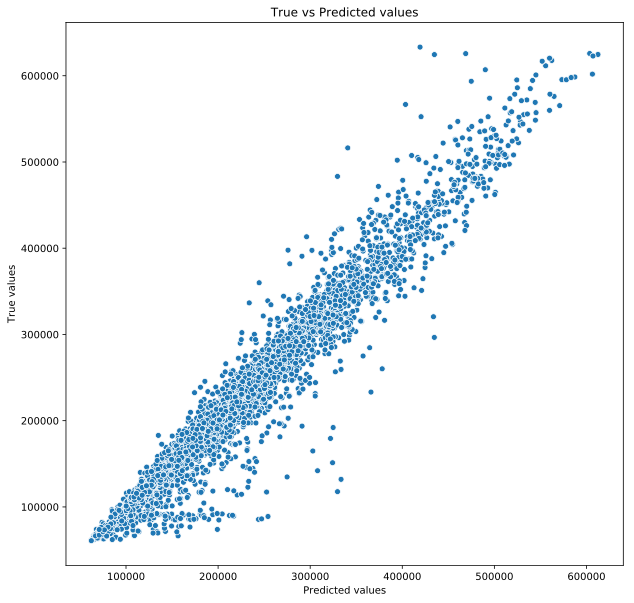

In [30]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.685
MAE:	31222.493
MSE:	2748772278.571


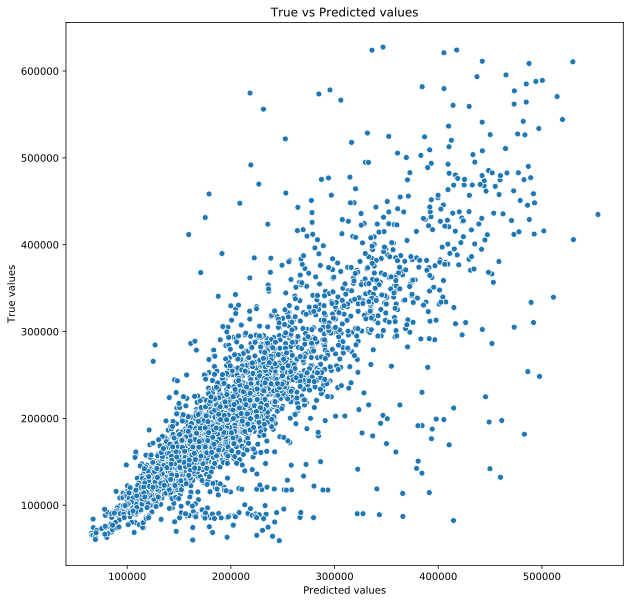

In [31]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

#### Gradient Boosting

In [32]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.758
MAE:	28970.711
MSE:	2075894620.615


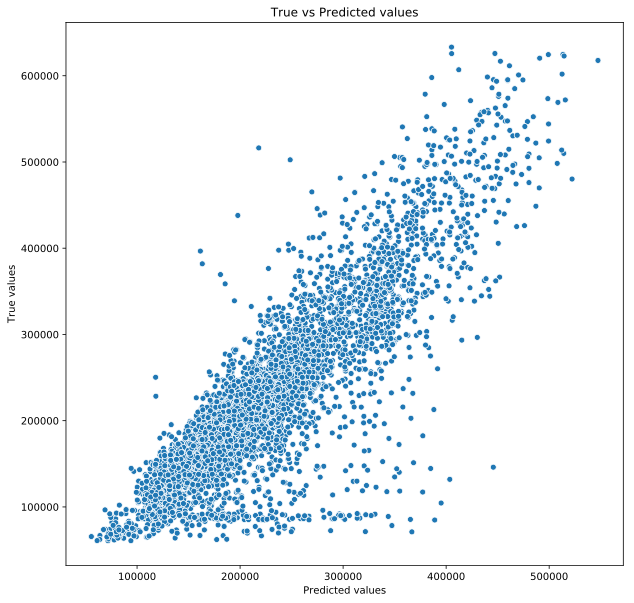

In [33]:
y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.718
MAE:	30792.791
MSE:	2459246625.549


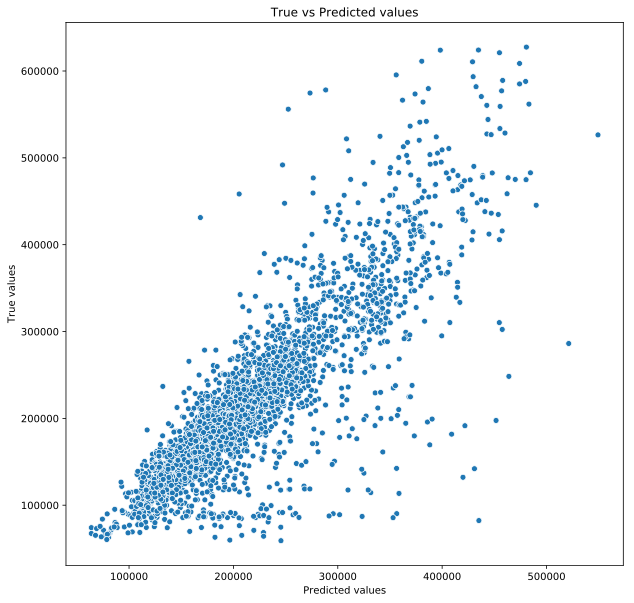

In [34]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

### Настройка и оценка финальной модели

#### Подбор гиперпараметров

#### Gradient Boosting

In [35]:
gb_model = GradientBoostingRegressor(random_state=666)
gb_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=666, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
params = {'n_estimators':[100, 200, 250, 300], 
          'max_depth':[3, 5, 7]}

gs = GridSearchCV(gb_model, params, scoring='r2', cv=KFold(n_splits=5, random_state=0, shuffle=True), n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...e=666, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 250, 300], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [44]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [45]:
gs.best_score_

0.7407782407437354

#### Random Forest

In [46]:
rf_model = RandomForestRegressor(random_state=666)
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=666, verbose=0, warm_start=False)

In [50]:
params_rf = {'n_estimators':[200, 250, 350], 
          'max_depth':[7,10,15]}

gs_rf = GridSearchCV(rf_model, params_rf, scoring='r2', cv=KFold(n_splits=5, random_state=0, shuffle=True), n_jobs=-1)
gs_rf.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=666, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200, 250, 350], 'max_depth': [7, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [51]:
gs_rf.best_params_

{'max_depth': 15, 'n_estimators': 250}

In [52]:
gs_rf.best_score_

0.7298078686864973